Hw5 Practical
//
Sepehr Ashrafzadeh           96101216


<div dir='rtl'>
    ابتدا کتابخانه های مورد نیاز را import میکنیم
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn   # just for using heatmap for confusion matrix visualization
from sklearn.datasets import load_iris

<div dir='rtl'>
   با استفاده از sklearn دیتاست مورد نظر را لود کرده و به دیتافریم تبدیل میکنیم
</div>

In [2]:
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df = df.astype(float)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


PERCEPTRON

<div dir='rtl'>
کلاس دوم را از دیتافریم حذف میکنیم
</div>

In [3]:
df_percep = df[df["target"] != 2]
df_percep

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


<div dir='rtl'>
   
بعد از shuffle کردن داده ها ان ها را به قسمت تست و ترین تقسیم میکنیم
</div>

In [4]:
df_percep = df_percep.sample(frac = 1)
x_percep = df_percep.drop("target" , axis = 1)
y_percep = df_percep[["target"]]

eighty_percent = int(df_percep.shape[0] * 0.8)
twenty_percent =int(df_percep.shape[0] - eighty_percent)

x_train_prc = x_percep[:eighty_percent]
y_train_prc = y_percep[:eighty_percent]

x_test_prc  = x_percep[eighty_percent:]
y_test_prc = y_percep[eighty_percent:]

print(x_train_prc.shape)
print(y_train_prc.shape)
print(x_test_prc.shape)
print(y_test_prc.shape)

(80, 4)
(80, 1)
(20, 4)
(20, 1)


<div dir='rtl'>
  تابع زیر را تعریف میکنیم تا اموزش بر روی داده های آموزشی را انجام دهد و تعداد داده هایی که درست طبقه بندی نشده اند را برگرداند
</div>

In [5]:
def perceptron(features , labels , epochs):
    
    w = np.zeros(shape=(1, features.shape[1]+1))
    misclassified_list = [] 
  
    for epoch in range(epochs):
        misclassified = 0
        for x, label in zip(features, labels):
            
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            
            if y > 0 :
                target = 1
            else :
                target = 0
                
            delta = (label - target)
            
            if(delta):
                misclassified += 1
                w += (delta * x)
        
        misclassified_list.append(misclassified)
    return (w, misclassified_list)
             
epochs = 10
w, misclassified_list = perceptron(x_train_prc.to_numpy() , y_train_prc.to_numpy(), epochs)

<div dir='rtl'>
تعداد موارد misclassified در هر دوره را نمایش میدهیم
</div>

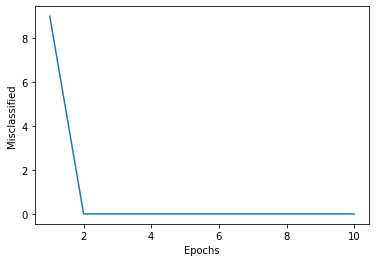

In [6]:
epochs = np.arange(1, epochs +1)
plt.plot(epochs, misclassified_list)
plt.xlabel('Epochs')
plt.ylabel('Misclassified')
plt.show()

Test Accuracy :  100.0 %
Classified Correctly :  20
Misclassified :  0


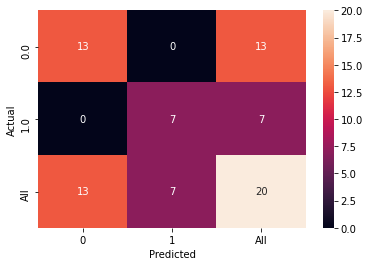

In [7]:
def predict(features , labels , w):
    misclassified = 0
    predictions = []
    for x, label in zip(features, labels):
        x = np.insert(x,0,1)
        y = np.dot(w, x.transpose())            
        if y > 0 :
            target = 1
        else :
            target = 0
        
        predictions.append(target)
        
        if label - target:
            misclassified += 1
                
    return misclassified , predictions

misclassified , pr = predict(x_test_prc.to_numpy() , y_test_prc.to_numpy() , w)
misclassified

print("Test Accuracy : " , (np.array(pr) == np.array(y_test_prc['target'].tolist())).mean() * 100 , "%")
print("Classified Correctly : " , len(y_test_prc) - misclassified)
print("Misclassified : " , misclassified)

confusion_df = pd.DataFrame({'Actual' : y_test_prc['target'].tolist() , 'Predicted' : np.array(pr)} )
confusion_matrix = pd.crosstab(confusion_df['Actual'], confusion_df['Predicted'], rownames=['Actual'], colnames=['Predicted'] , margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()
# confusion_matrix          

LOGISTIC PART A

In [8]:
df_logistic = df.sample(frac = 1)
data = np.array(df_logistic)

eighty_percent = int(data.shape[0] * 0.8)

x_train_lgs = data[:eighty_percent, :-1] 
y_train_lgs =data[:eighty_percent, -1]

x_test_lgs = data[eighty_percent:, :-1]
y_test_lgs = data[eighty_percent:, -1]

print(x_train_lgs.shape)
print(y_train_lgs.shape)
print(x_test_lgs.shape)
print(y_test_lgs.shape)


(120, 4)
(120,)
(30, 4)
(30,)


<div dir='rtl'>
   در قسمت زیر کلاس تعریف شده دسته بند مورد نظر سوال است که با توجه به فرمول های softmax , cross entropy و پیشبینی و گرادیان logliklihood 
    توابعی برای محاسبه ی این مقادیر پیاده سازی شده اند
</div>

In [9]:
def softmax(x):
    return np.exp(x) / np.array([np.sum(np.exp(x), axis=1)]).T
    
class LogisticRegression(object):
    def __init__(self, features, target, features_num, classes_num):
        
        self.x = features
        self.y = target
        self.w = np.zeros((features_num, classes_num))
        self.b = np.zeros(classes_num)        
        
    def train(self, lr, landa):
        
        p_y_x = softmax(np.dot(self.x, self.w) + self.b)
        d_y = self.y - p_y_x
        
        self.w += lr * np.dot(self.x.T, d_y) - lr * landa * np.linalg.norm(self.w, ord=2)
        self.b += lr * np.mean(d_y, axis=0)

    def negative_log_likelihood(self):
        h = softmax(np.dot(self.x, self.w) + self.b)
        return -np.mean(np.sum(self.y * np.log(h) + (1 - self.y) * np.log(1 - h) , axis = 1))

    def predict(self, x):
        return softmax(np.dot(x, self.w) + self.b)
    
def run_classifier(learning_rate, n_epochs , x_train , y_train , x_test , landa):
    
    x = np.array(x_train)
    y = np.array(y_train)
    
    classifier = LogisticRegression(features=x, target=y, features_num=x.shape[1], classes_num=y.shape[1])
    
    cost = []
    for epoch in range(n_epochs):
        classifier.train(lr = learning_rate , landa = landa)
        cost.append(classifier.negative_log_likelihood())
        learning_rate *= 0.95  # learn rate -> smaller amount

    prediction = classifier.predict(x_test).argmax(1)
    return cost , prediction



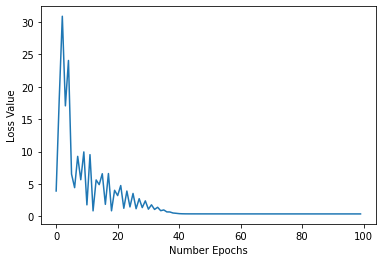

In [10]:
cost , pr = run_classifier(0.007 , 100 , x_train_lgs.tolist() , pd.get_dummies(y_train_lgs).to_numpy().tolist() , x_test_lgs.tolist() , 0)

plt.plot(cost)
plt.xlabel('Number Epochs') 
plt.ylabel('Loss Value')
plt.show()

Test Accuracy :  96.66666666666667 %
Classified Correctly :  29.0
Misclassified :  1.0


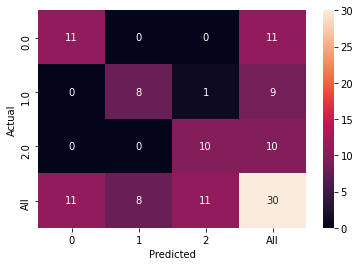

In [11]:
print("Test Accuracy : " , (pr == y_test_lgs).mean() * 100 , "%")
print("Classified Correctly : " , (pr == y_test_lgs).mean() * len(y_test_lgs))
print("Misclassified : " , len(y_test_lgs) - (pr == y_test_lgs).mean() * len(y_test_lgs))

confusion_df = pd.DataFrame({'Actual' : y_test_lgs , 'Predicted' : pr} )
confusion_matrix = pd.crosstab(confusion_df['Actual'], confusion_df['Predicted'], rownames=['Actual'], colnames=['Predicted'] , margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()
#confusion_matrix

LOGISTIC PART B

Test Accuracy :  96.66666666666667 %
Classified Correctly :  29.0
Misclassified :  1.0


Text(0, 0.5, 'Loss Value')

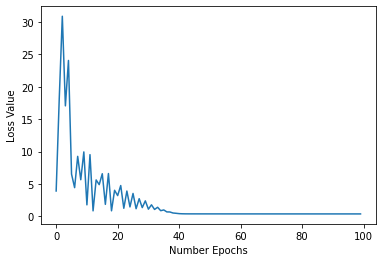

In [12]:
landa = 0.0001
cost , pr = run_classifier(0.007 , 100 , x_train_lgs.tolist() , pd.get_dummies(y_train_lgs).to_numpy().tolist() , x_test_lgs.tolist() , 0.1)

print("Test Accuracy : " , (pr == y_test_lgs).mean() * 100 , "%")
print("Classified Correctly : " , (pr == y_test_lgs).mean() * len(y_test_lgs))
print("Misclassified : " , len(y_test_lgs) - (pr == y_test_lgs).mean() * len(y_test_lgs))

plt.plot(cost)
plt.xlabel('Number Epochs') 
plt.ylabel('Loss Value')

LANDA = 0.1

Test Accuracy :  96.66666666666667 %
Classified Correctly :  29.0
Misclassified :  1.0


Text(0, 0.5, 'Loss Value')

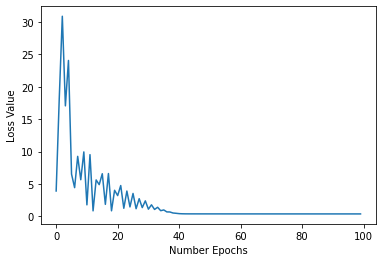

In [13]:
landa = 0.1
cost , pr = run_classifier(0.007 , 100 , x_train_lgs.tolist() , pd.get_dummies(y_train_lgs).to_numpy().tolist() , x_test_lgs.tolist() , landa)

print("Test Accuracy : " , (pr == y_test_lgs).mean() * 100 , "%")
print("Classified Correctly : " , (pr == y_test_lgs).mean() * len(y_test_lgs))
print("Misclassified : " , len(y_test_lgs) - (pr == y_test_lgs).mean() * len(y_test_lgs))

plt.plot(cost)
plt.xlabel('Number Epochs') 
plt.ylabel('Loss Value')

LANDA = 1

Test Accuracy :  96.66666666666667 %
Classified Correctly :  29.0
Misclassified :  1.0


Text(0, 0.5, 'Loss Value')

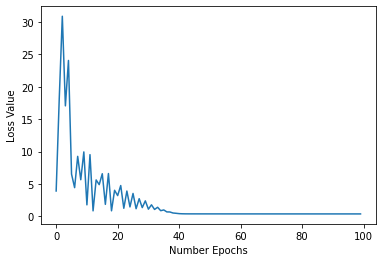

In [14]:
landa = 1
cost , pr = run_classifier(0.007 , 100 , x_train_lgs.tolist() , pd.get_dummies(y_train_lgs).to_numpy().tolist() , x_test_lgs.tolist() , landa)

print("Test Accuracy : " , (pr == y_test_lgs).mean() * 100 , "%")
print("Classified Correctly : " , (pr == y_test_lgs).mean() * len(y_test_lgs))
print("Misclassified : " , len(y_test_lgs) - (pr == y_test_lgs).mean() * len(y_test_lgs))

plt.plot(cost)
plt.xlabel('Number Epochs') 
plt.ylabel('Loss Value')

LANDA = 10

Test Accuracy :  96.66666666666667 %
Classified Correctly :  29.0
Misclassified :  1.0


Text(0, 0.5, 'Loss Value')

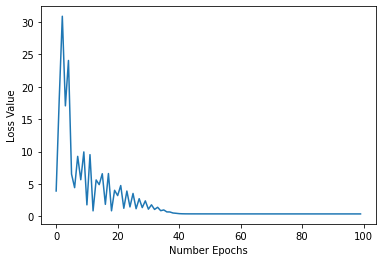

In [15]:
landa = 10
cost , pr = run_classifier(0.007 , 100 , x_train_lgs.tolist() , pd.get_dummies(y_train_lgs).to_numpy().tolist() , x_test_lgs.tolist() , landa)

print("Test Accuracy : " , (pr == y_test_lgs).mean() * 100 , "%")
print("Classified Correctly : " , (pr == y_test_lgs).mean() * len(y_test_lgs))
print("Misclassified : " , len(y_test_lgs) - (pr == y_test_lgs).mean() * len(y_test_lgs))

plt.plot(cost)
plt.xlabel('Number Epochs') 
plt.ylabel('Loss Value')